In [2]:
%run base_functions.ipynb

In [3]:
ca_info = load_ca_info(365*10)

loading url  Dividend https://www.nseindia.com/api/corporates-corporateActions {'index': 'equities', 'csv': 'true', 'from_date': '11-12-2012', 'to_date': '09-12-2022'}
loading cookies for https://www.nseindia.com/


{'https://www.nseindia.com/': <Response [200]>}

Dividend https://www.nseindia.com/api/corporates-corporateActions {'index': 'equities', 'csv': 'true', 'from_date': '11-12-2012', 'to_date': '09-12-2022'} <Response [200]>


In [4]:
ca_info.columns

Index(['SYMBOL', 'COMPANY NAME', 'SERIES', 'PURPOSE', 'FACE VALUE', 'EX-DATE',
       'RECORD DATE', 'BOOK CLOSURE START DATE', 'BOOK CLOSURE END DATE'],
      dtype='object')

In [5]:
div_info = ca_info
div_info['Ex-Date'] = pd.to_datetime(div_info['EX-DATE'], dayfirst=True)
div_info['PURPOSE'] = div_info['PURPOSE'].str.lower()
div_info = div_info[div_info['PURPOSE'].str.contains('dividend ')].set_index('SYMBOL').reset_index()

div_info["dividend"] = div_info["PURPOSE"].str.extract(r'.*r[s|e][\s.-]*([0-9.]*).*per.*')
div_info["dividend"].fillna(div_info['PURPOSE'].str.extract('(\d*\.\d+|\d+)', expand=False).astype(float),inplace=True)
#div_info["dividend"] = div_info["dividend"].str.strip()
div_info["dividend"] = pd.to_numeric(div_info["dividend"], errors='coerce')
#div_info["dividend"].fillna(div_info["dividend_2"],inplace=True)


In [6]:
div_info[div_info["dividend"].isnull()]

,SYMBOL,COMPANY NAME,SERIES,PURPOSE,FACE VALUE,EX-DATE,RECORD DATE,BOOK CLOSURE START DATE,BOOK CLOSURE END DATE,Ex-Date,dividend
1390,AARTIDRUGS,Aarti Drugs Limited,EQ,annual general meeting/dividend rs:- 5.50 per ...,10.00,02-Jul-2014,-,04-Jul-2014,11-Jul-2014,2014-07-02,NaN
1483,DEEPAKFERT,Deepak Fertilizers and Petrochemicals Corporat...,EQ,annual general meeting/dividend rs:- 6.50/- pe...,10.00,17-Jul-2014,-,21-Jul-2014,31-Jul-2014,2014-07-17,NaN
1513,SINTEX,Sintex Industries Limited,EQ,annual general meeting/dividend rs:- 0.70/- pe...,1.00,18-Jul-2014,-,22-Jul-2014,01-Aug-2014,2014-07-18,NaN
1564,BRIGADE,Brigade Enterprises Limited,EQ,annual general meeting/dividend rs:- 2/- per s...,10.00,25-Jul-2014,-,29-Jul-2014,05-Aug-2014,2014-07-25,NaN
1574,ALKYLAMINE,Alkyl Amines Chemicals Limited,EQ,annual general meeting/ dividend rs:- 8/- per ...,2.00,28-Jul-2014,-,31-Jul-2014,07-Aug-2014,2014-07-28,NaN
2595,GLAXO,GlaxoSmithKline Pharmaceuticals Limited,EQ,annual general meeting/dividend - rs 62..50/- ...,10.00,23-Jul-2015,-,25-Jul-2015,31-Jul-2015,2015-07-23,NaN
4575,CGCL,Capri Global Capital Limited,EQ,annual general meeting/dividend - re 0..30 pe...,2.00,05-Jul-2017,-,07-Jul-2017,17-Jul-2017,2017-07-05,NaN
7516,SANOFI,Sanofi India Limited,EQ,dividend - rs 106 per share special dividend ...,10.00,29-Jun-2020,-,01-Jul-2020,07-Jul-2020,2020-06-29,NaN
8284,SANOFI,Sanofi India Limited,EQ,dividend - rs 125 per share special dividend ...,10.00,19-Apr-2021,-,21-Apr-2021,27-Apr-2021,2021-04-19,NaN
8469,ABBOTINDIA,Abbott India Limited,EQ,annual general meeting/dividend - rs 120 per ...,10.00,19-Jul-2021,-,21-Jul-2021,27-Jul-2021,2021-07-19,NaN


In [7]:
div_info[div_info['SYMBOL'] == 'OFSS']

,SYMBOL,COMPANY NAME,SERIES,PURPOSE,FACE VALUE,EX-DATE,RECORD DATE,BOOK CLOSURE START DATE,BOOK CLOSURE END DATE,Ex-Date,dividend
2126,OFSS,Oracle Financial Services Software Limited,EQ,interim dividend - rs 485/- per share,5.00,24-Sep-2014,25-Sep-2014,-,-,2014-09-24,485.00
2864,OFSS,Oracle Financial Services Software Limited,EQ,annual general meeting/ dividend - rs 180/- p...,5.00,03-Sep-2015,-,07-Sep-2015,11-Sep-2015,2015-09-03,180.00
3960,OFSS,Oracle Financial Services Software Limited,EQ,annual general meeting/ dividend -rs 100/- pe...,5.00,30-Aug-2016,-,01-Sep-2016,07-Sep-2016,2016-08-30,100.00
4478,OFSS,Oracle Financial Services Software Limited,EQ,interim dividend rs 170 per share,5.00,19-Apr-2017,20-Apr-2017,-,-,2017-04-19,170.00
7492,OFSS,Oracle Financial Services Software Limited,EQ,interim dividend -rs 180 per share,5.00,19-May-2020,20-May-2020,-,-,2020-05-19,180.00
8305,OFSS,Oracle Financial Services Software Limited,EQ,interim dividend - rs 200 per share,5.00,17-May-2021,18-May-2021,-,-,2021-05-17,200.00
9559,OFSS,Oracle Financial Services Software Limited,EQ,interim dividend - rs 190 per share,5.00,13-May-2022,17-May-2022,-,-,2022-05-13,190.00


In [8]:
#div_info

In [9]:
index_info = load_index_data('NIFTY 500')

loading url  NIFTY 500 https://www.nseindia.com/api/equity-stockIndices?csv=false&index=NIFTY%20500 {}
NIFTY 500 https://www.nseindia.com/api/equity-stockIndices?csv=false&index=NIFTY%20500 {} <Response [200]>


In [10]:
#display_full(index_info)

In [11]:
index_info
index_info["LTP"] = index_info["LTP"].str.replace(',','')
index_info["LTP"] = pd.to_numeric(index_info["LTP"], errors='coerce')
index_info[index_info['LTP'].isnull()]

,SYMBOL,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CHNG,%CHNG,VOLUME(shares),VALUE,52W H,52W L,365 D % CHNG 14-Oct-2021,30 D % CHNG 16-Sep-2022


In [12]:
merge_data = div_info.merge(index_info)

In [13]:
# currently not pulling data for dividend date, calculation is as of price
merge_data['div_y'] = merge_data['dividend'] * 100 / merge_data['LTP']

In [14]:
merge_data[['Ex-Date']].columns

Index(['Ex-Date'], dtype='object')

In [29]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 
          'May', 'Jun', 'Jul', 'Aug', 
          'Sep', 'Oct', 'Nov', 'Dec']


sortedby_date = merge_data[['SYMBOL','dividend','div_y','Ex-Date','LTP']]
sortedby_date['Ex-Date'] = pd.DatetimeIndex(sortedby_date['Ex-Date'])
sortedby_date['Month'] = sortedby_date['Ex-Date'].dt.strftime('%b').astype('category')
sortedby_date['Month'] = sortedby_date['Month'].cat.set_categories(months)
sortedby_date['Year'] = sortedby_date['Ex-Date'].dt.strftime('%Y')
sortedby_date['year count'] = sortedby_date.groupby(['SYMBOL'])['Year'].transform('nunique')
sortedby_date['month count'] = sortedby_date.groupby(['SYMBOL','Month'])['Year'].transform('nunique')

sortedby_date= sortedby_date.sort_values(['Year','Month','div_y'],ascending=[True,False,False])

In [34]:
#filter_data = sortedby_date
#filter_data = sortedby_date[sortedby_date['div_y']>3]

#display_full(filter_data)
sortedby_date['div_y_yearly'] = sortedby_date[['SYMBOL','Year','div_y']].groupby(['SYMBOL','Year']).transform('sum')


In [35]:
final_div_data = sortedby_date.groupby(['Month','Year']).head(5000).sort_values(['Month','Year','div_y'],ascending=[True,False,False]).set_index(['Month','Year','SYMBOL'])

#display_full(filter_by_index(final_div_data[final_div_data['year count'] >=  final_div_data['month count']],column='Year',values=['2020','2021']))

display_full(filter_by_index(final_div_data,column='Year',values=['2022','2021']))

dividend  div_y    Ex-Date       LTP  year count  \
Month Year SYMBOL                                                         
Jan   2022 HGS           150.00  11.25 2022-01-17  1,333.50          10   
           SAREGAMA       30.00   8.04 2022-01-31    373.15           9   
           CESC            4.50   5.88 2022-01-24     76.50          10   
           HCLTECH        10.00   0.97 2022-01-20  1,027.55          10   
           MAZDOCK         7.10   0.79 2022-01-06    895.85           2   
           DCMSHRIRAM      5.20   0.59 2022-01-24    886.45           9   
           CCL             3.00   0.59 2022-01-31    512.35           9   
           PERSISTENT     20.00   0.50 2022-01-27  3,992.00          10   
           ANGELONE        7.00   0.47 2022-01-24  1,499.95           3   
           MASTEK          7.00   0.39 2022-01-31  1,774.95          10   
           SIEMENS         8.00   0.27 2022-01-20  2,953.10           8   
           WIPRO           1.00   0.25 2022-01-21    395.15          10   
           LTTS           10.00   0.25 2022-01-25  4,010.00           7   
           TCS             7.00   0.21 2022-01-19  3,288.95          10   
           NAUKRI          8.00   0.20 2022-01-17  4,006.20          10   
      2021 CESC           45.00  58.82 2021-01-22     76.50          10   
           GAIL            2.50   2.71 2021-01-27     92.35          10   
           IEX             2.50   1.71 2021-01-28    146.20           4   
           COCHINSHIP      9.00   1.45 2021-01-13    619.00           4   
           RITES           5.00   1.36 2021-01-08    368.50           5   
           SRF            19.00   0.80 2021-01-29  2,376.10          10   
           DCMSHRIRAM      5.50   0.62 2021-01-27    886.45           9   
           ZENSARTECH      1.20   0.53 2021-01-29    227.95          10   
           HCLTECH         4.00   0.39 2021-01-21  1,027.55          10   
           WIPRO           1.00   0.25 2021-01-22    395.15          10   
           HAVELLS         3.00   0.25 2021-01-28  1,195.85           9   
           SIEMENS         7.00   0.24 2021-01-27  2,953.10           8   
           TCS             6.00   0.18 2021-01-14  3,288.95          10   
           GMMPFAUDLR      1.00   0.05 2021-01-28  1,929.95           5   
Feb   2022 PCBL           10.00   7.51 2022-02-01    133.20           8   
           RECLTD          6.00   5.33 2022-02-15    112.50          10   
           IOC             4.00   5.16 2022-02-09     77.55          10   
           PFC             6.00   4.20 2022-02-25    142.75           9   
           NATIONALUM      3.00   3.84 2022-02-17     78.05          10   
           FSL             3.50   3.26 2022-02-17    107.25           4   
           NHPC            1.31   3.14 2022-02-22     41.70          10   
           SJVN            1.15   3.00 2022-02-21     38.35          10   
           OIL             5.75   2.81 2022-02-22    204.60          10   
           POWERGRID       5.50   2.54 2022-02-16    216.45          10   
           ENGINERSIN      2.00   2.53 2022-02-16     79.10          10   
           NTPC            4.00   2.36 2022-02-03    169.30          10   
           HEROMOTOCO     60.00   2.19 2022-02-21  2,744.60          10   
           COALINDIA       5.00   2.18 2022-02-21    229.70          10   
           HGS            28.00   2.10 2022-02-22  1,333.50          10   
           POLYPLEX       35.00   2.06 2022-02-24  1,703.00          10   
           MOIL            3.00   1.86 2022-02-24    161.60          10   
           TORNTPOWER      9.00   1.68 2022-02-10    536.40           8   
           ITC             5.25   1.55 2022-02-14    339.10           8   
           TORNTPHARM     25.00   1.53 2022-02-02  1,636.50          10   
           BPCL            5.00   1.49 2022-02-10    336.60          10   
           CHAMBLFERT      4.50   1.47 2022-02-04    306.20           9   
           BEL             1.50   1.42 2022-02-0

<AxesSubplot:xlabel='Month', ylabel='count'>

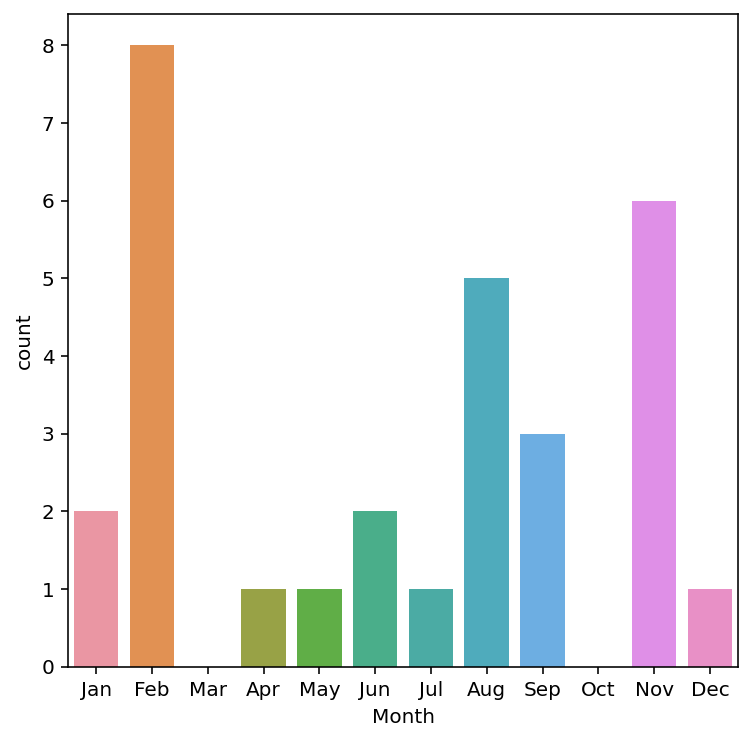

In [36]:
sns.countplot(x='Month',data=sortedby_date[sortedby_date['div_y_yearly']>7][sortedby_date['Year']=='2022'])

In [52]:
display_full(sortedby_date[sortedby_date['div_y_yearly']>7][sortedby_date['Year']>='2021'].sort_values(['SYMBOL','Ex-Date','div_y_yearly'],ascending=[True,True,False]))

,SYMBOL,dividend,div_y,Ex-Date,LTP,Month,Year,year count,month count,div_y_yearly
3562,BPCL,16.00,4.75,2021-02-17,336.60,Feb,2021,10,6,18.12
3563,BPCL,5.00,1.49,2021-03-25,336.60,Mar,2021,10,4,18.12
3564,BPCL,35.00,10.40,2021-09-16,336.60,Sep,2021,10,3,18.12
3565,BPCL,5.00,1.49,2021-11-11,336.60,Nov,2021,10,1,18.12
2094,CESC,45.00,58.82,2021-01-22,76.50,Jan,2021,10,2,58.82
1113,COALINDIA,5.00,2.18,2021-03-15,229.70,Mar,2021,10,8,7.62
1114,COALINDIA,3.50,1.52,2021-09-02,229.70,Sep,2021,10,2,7.62
1115,COALINDIA,9.00,3.92,2021-12-06,229.70,Dec,2021,10,1,7.62
1116,COALINDIA,5.00,2.18,2022-02-21,229.70,Feb,2022,10,1,10.01
1117,COALINDIA,3.00,1.31,2022-08-11,229.70,Aug,2022,10,1,10.01


In [20]:
update_portfolio_file(merge_data,'dividend.csv',False)

In [20]:
#update_portfolio_file(nifty_next_50,'nifty_500.csv',False)